In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import os
os.chdir('E:\Documents')

In [76]:
heart= pd.read_csv('heart.csv')


In [77]:
heart.sample(10)# hien 10 dong ngau nhien

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
644,71,F,NAP,110,265,1,LVH,130,N,0.0,Up,0
799,53,M,NAP,130,246,1,LVH,173,N,0.0,Up,0
100,65,M,ASY,130,275,0,ST,115,Y,1.0,Flat,1
852,43,M,ASY,120,177,0,LVH,120,Y,2.5,Flat,1
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0
169,58,M,NAP,140,179,0,Normal,160,N,0.0,Up,0
362,56,M,NAP,155,0,0,ST,99,N,0.0,Flat,1
593,64,M,ASY,130,258,1,LVH,130,N,0.0,Flat,1
186,58,M,ATA,130,251,0,Normal,110,N,0.0,Up,0
874,43,M,ASY,150,247,0,Normal,171,N,1.5,Up,0


In [78]:
heart.shape

(918, 12)

In [79]:
heart.columns # hien cac cot

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [80]:
"""
Age: tuổi của bệnh nhân [years]
Sex: giới tính [M: Male, F: Female]
ChestPainType: Loại đau ngực. TA: Typical Angina(Đau thắt ngực điển hình),
ATA:Atypical Angina (đau thắt ngực không điển hình,NAP: Non-Anginal Pain(không đau thắt ngực),
ASY: Asymptomatic(không có triệu chứng)
RestingBP: huyết áp tâm trương [mm Hg])
Cholesterol: chỉ số cholesterol (xét nghiệm mỡ máu) [mg/dl] 
FastingBS: lượng đường huyết (1: nếu BS>120, 0: <120)
RestingECG:chỉ số điện tâm đồ(Normal: bình thường,ST: có sự bất thường,
LVH:  cho thấy phì đại thất trái có thể xảy ra hoặc được xác định theo tiêu chí của Estes )
MaxHR: nhịp tim tối đa( 60-120)
ExerciseAngina: đau thắt ngực do tập thể dục(Y: Có,N:Không)
Oldpeak: Oldpeak =ST (Oldpeak là một giá trị số học đo lường mức độ suy giảm của đoạn sóng ST trên điện tâm đồ
(ECG) sau thử nghiệm thể dục (hoặc stress test).)
ST_Slope: T_Slope là thuộc tính mô tả hình dạng của đoạn sóng ST sau thử nghiệm thể dục trên ECG.
Có ba giá trị chính cho ST_Slope: "Up" (tăng dốc lên), "Flat" (phẳng), và "Down" (hạ xuống).
HeartDisease: Bệnh tim (1: bị bệnh,0: bình thường)
"""

'\nAge: tuổi của bệnh nhân [years]\nSex: giới tính [M: Male, F: Female]\nChestPainType: Loại đau ngực. TA: Typical Angina(Đau thắt ngực điển hình),\nATA:Atypical Angina (đau thắt ngực không điển hình,NAP: Non-Anginal Pain(không đau thắt ngực),\nASY: Asymptomatic(không có triệu chứng)\nRestingBP: huyết áp tâm trương [mm Hg])\nCholesterol: chỉ số cholesterol (xét nghiệm mỡ máu) [mg/dl] \nFastingBS: lượng đường huyết (1: nếu BS>120, 0: <120)\nRestingECG:chỉ số điện tâm đồ(Normal: bình thường,ST: có sự bất thường,\nLVH:  cho thấy phì đại thất trái có thể xảy ra hoặc được xác định theo tiêu chí của Estes )\nMaxHR: nhịp tim tối đa( 60-120)\nExerciseAngina: đau thắt ngực do tập thể dục(Y: Có,N:Không)\nOldpeak: Oldpeak =ST (Oldpeak là một giá trị số học đo lường mức độ suy giảm của đoạn sóng ST trên điện tâm đồ\n(ECG) sau thử nghiệm thể dục (hoặc stress test).)\nST_Slope: T_Slope là thuộc tính mô tả hình dạng của đoạn sóng ST sau thử nghiệm thể dục trên ECG.\nCó ba giá trị chính cho ST_Slope: 

In [81]:
 # thong tin cac cot. de xem cac cot kieu nao la kieu so, kieu nao la dinh danh
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [82]:
heart.describe() #thong ke mo ta chung

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


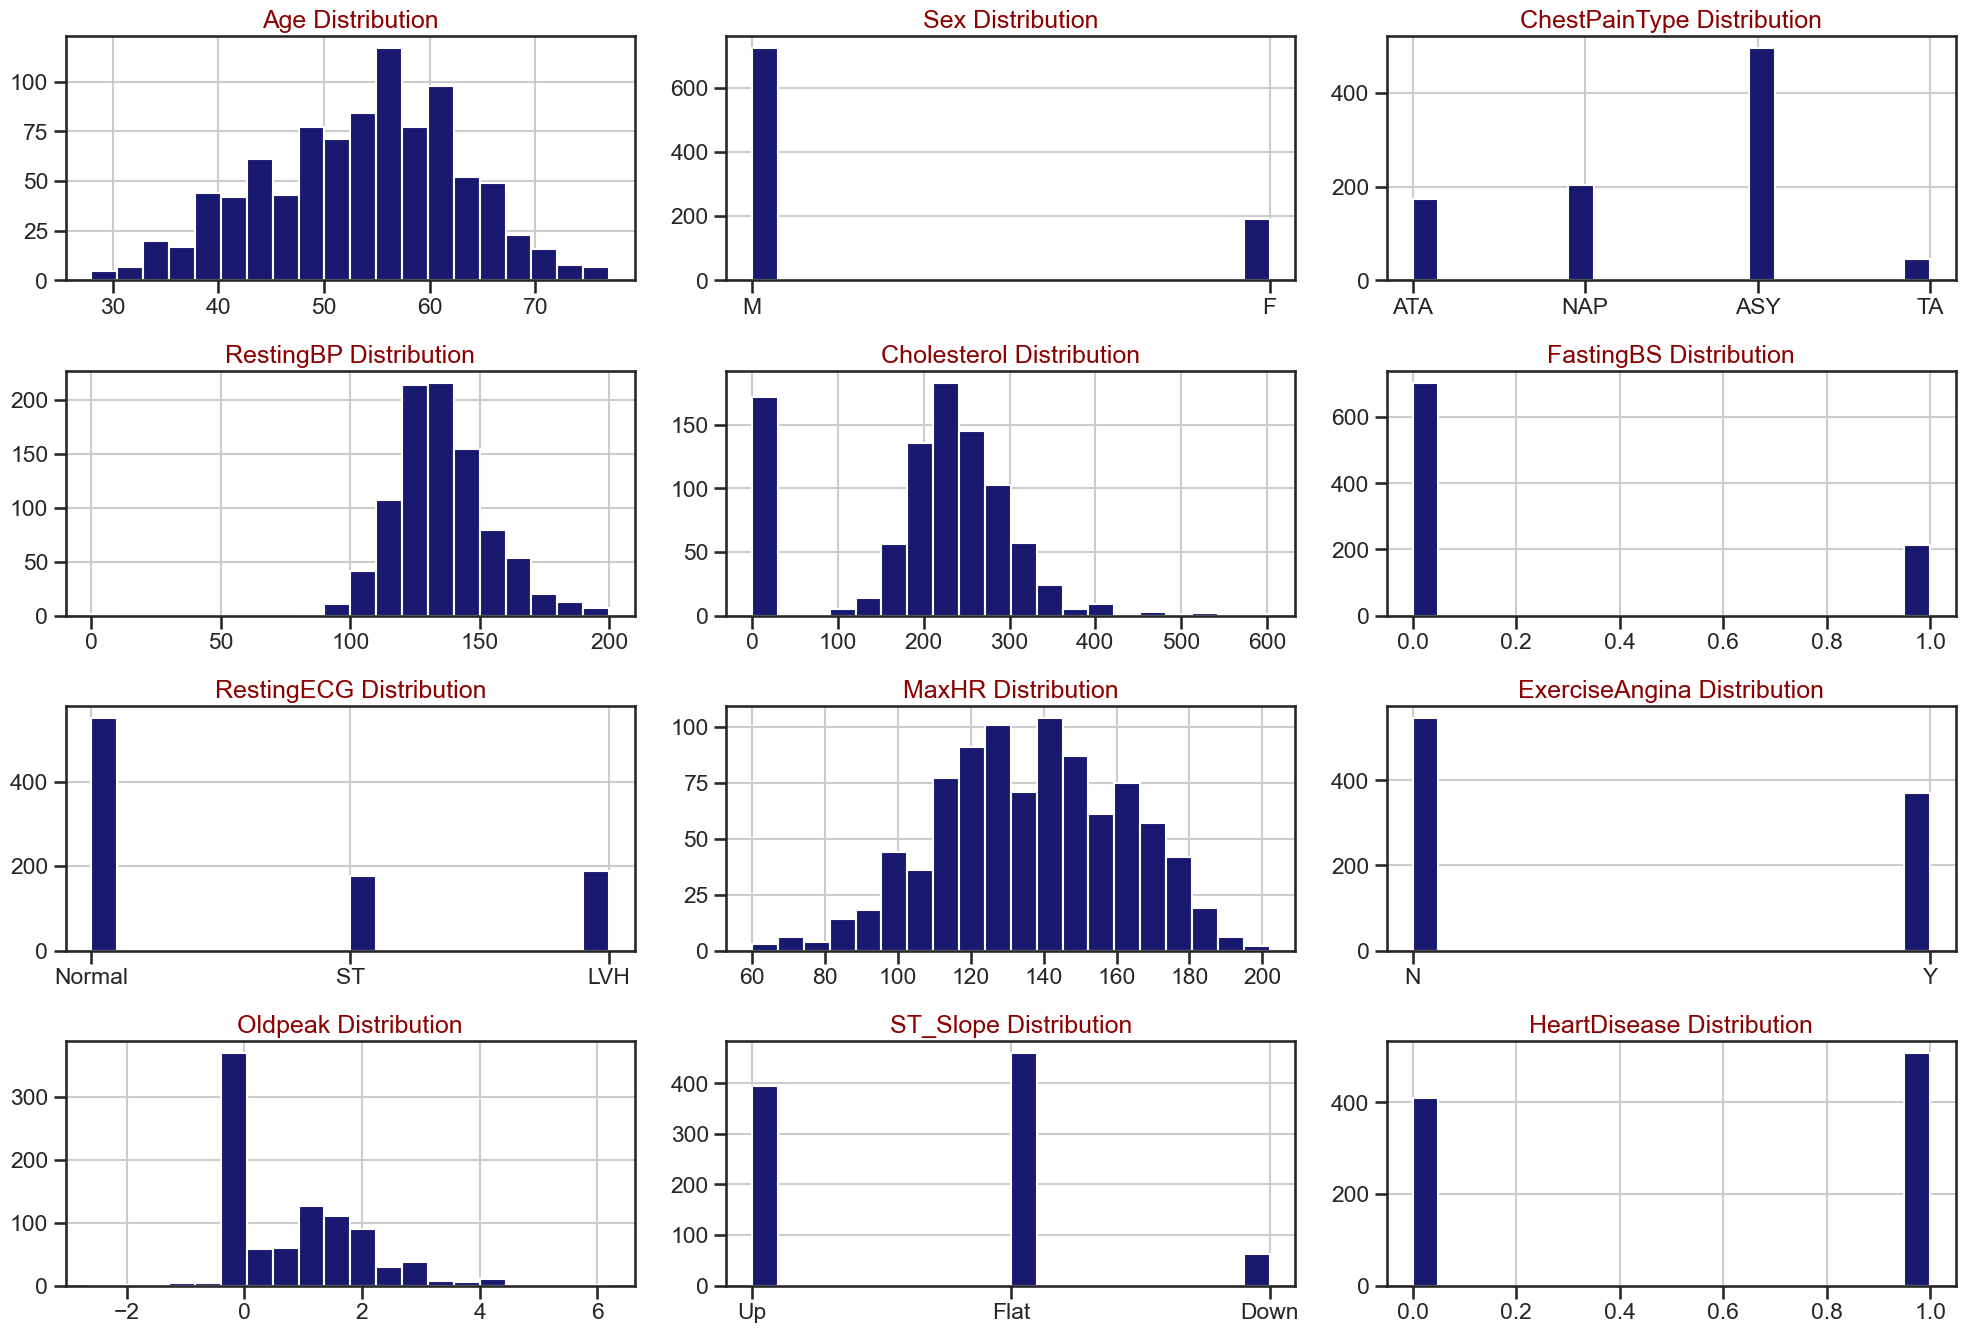

In [83]:
# Phân tích khám phá
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart,heart.columns,6,3)

In [84]:
# chuyển tên cột thành chữ 
heart.columns = heart.columns.str.lower()

# phân loại dữ liệu
catg_lst = heart.select_dtypes(include='object').columns

num_lst = heart.select_dtypes(include=['int64','float64']).columns


In [85]:

low_range = heart[num_lst].quantile(0.25)
high_range = heart[num_lst].quantile(0.75)
iqr_num_list_data = pd.DataFrame({
'Features':num_lst,
'Majority of the values':[f'{low_range.loc[i]} - {high_range.loc[i]}' for i in num_lst]})

iqr_num_list_data['percentage of values'] = [round( ((heart[i]>=low_range.loc[i]) & (heart[i]<=high_range.loc[i])).mean() *100,2)
for i in num_lst]


cat_elem_range = heart[catg_lst].apply(lambda x: x.value_counts().idxmax())
perc_data = heart[catg_lst].apply(lambda x: round(x.value_counts().max()/len(x)*100,2))
iqr_catg_list_data = pd.DataFrame({
'Features':catg_lst,
'Majority of the values':cat_elem_range,
'percentage of values':perc_data })


iqr_data = pd.concat([iqr_num_list_data, iqr_catg_list_data],axis=0,join='outer')
iqr_data.sort_values(by='percentage of values',ascending=False,inplace=True)
iqr_data.reset_index(drop=True, inplace=True)

iqr_data

,Features,Majority of the values,percentage of values
0,heartdisease,0.0 - 1.0,100.00
1,sex,M,78.98
2,fastingbs,0.0 - 0.0,76.69
3,oldpeak,0.0 - 1.5,74.40
4,restingecg,Normal,60.13
5,exerciseangina,N,59.59
6,restingbp,120.0 - 140.0,58.50
7,chestpaintype,ASY,54.03
8,age,47.0 - 60.0,51.96
9,maxhr,120.0 - 156.0,51.42


In [86]:
(heart[['cholesterol','restingbp']]==0).sum()

cholesterol    172
restingbp        1
dtype: int64

In [87]:
old_data = heart.copy()
heart = heart[ (heart['cholesterol']!=0) & (heart['restingbp']!=0) ]
print('Old Data Shape: ',old_data.shape)
print('New Data Shape: ',heart.shape)

Old Data Shape:  (918, 12)
New Data Shape:  (746, 12)


C:\Users\FPT\AppData\Local\Temp\ipykernel_20660\1490508930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.countplot(data=heart, x='heartdisease', palette="Set1")


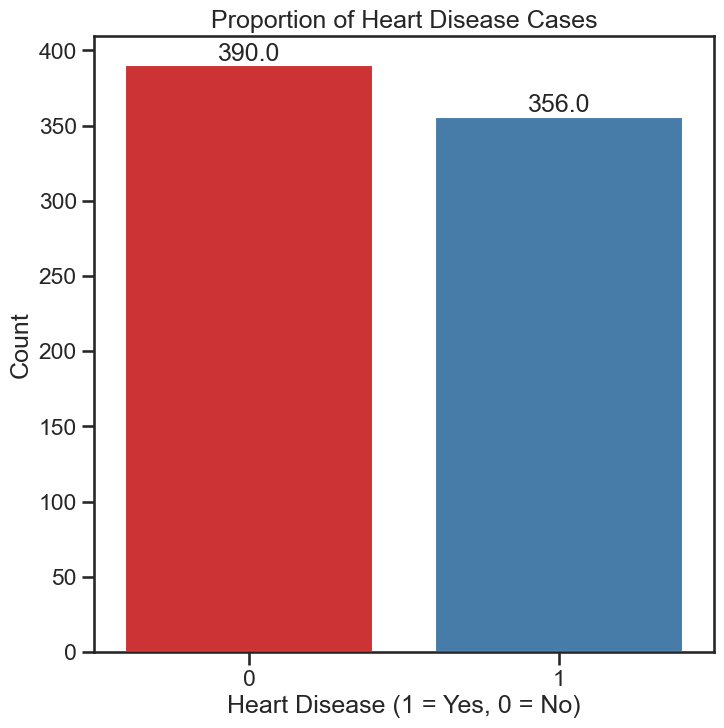

In [88]:
plt.figure(figsize=(8, 8))
ax = sn.countplot(data=heart, x='heartdisease', palette="Set1")

# Set labels and title
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Proportion of Heart Disease Cases")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Show the plot
plt.show()

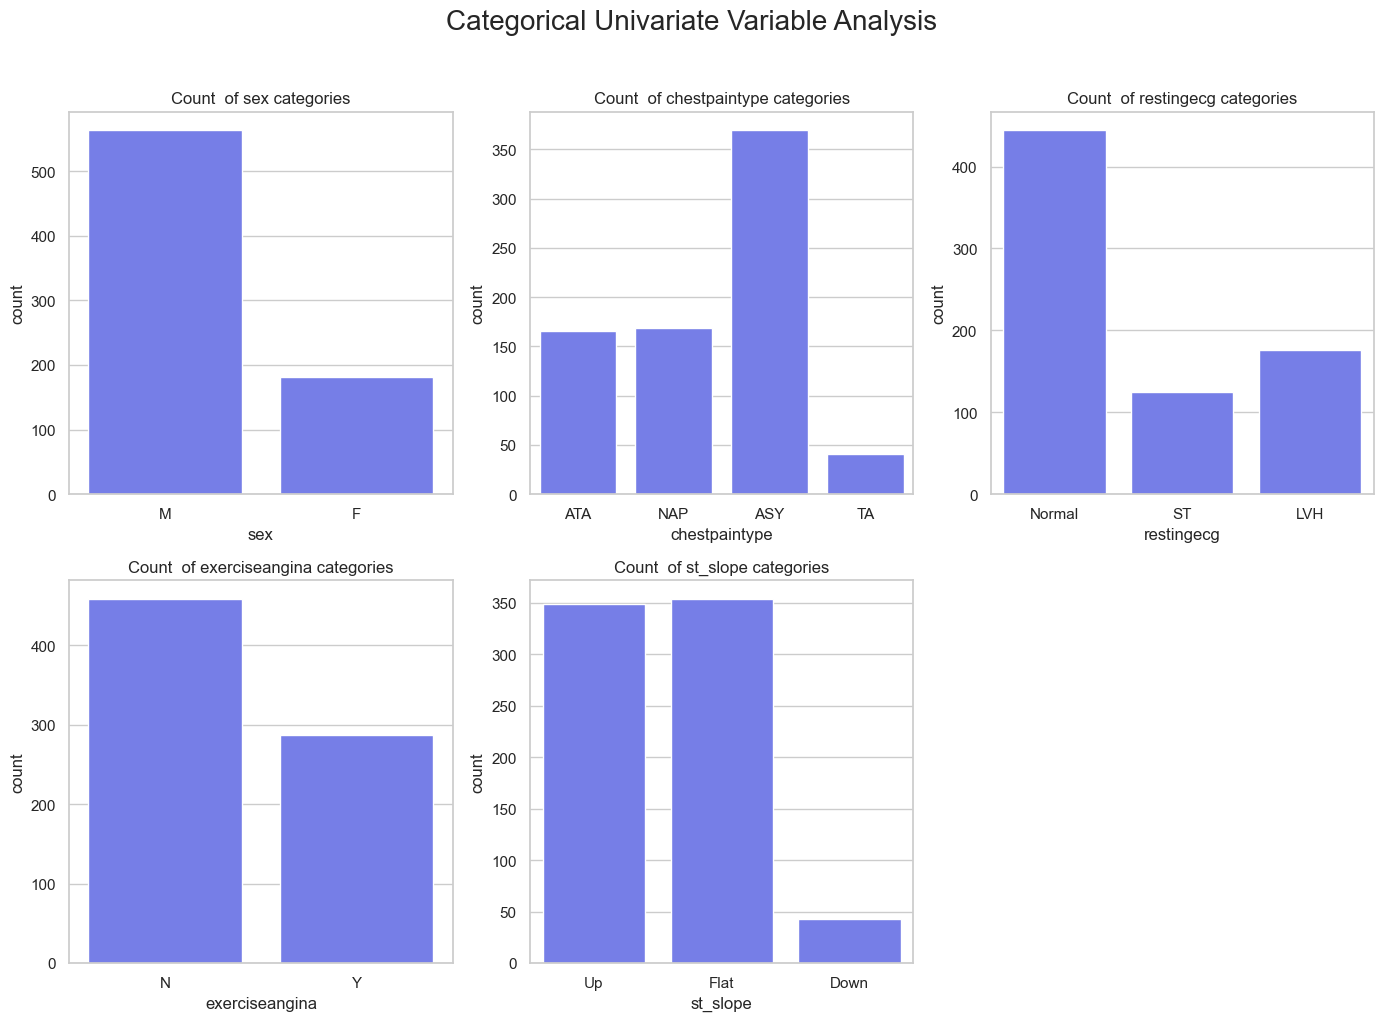

In [89]:
color = '#636EFA'
sn.set(style="whitegrid")
fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(catg_lst):
    plt.subplot(2,3,i+1)
    sn.countplot(data=heart,x=heart[col],color=color)
    plt.title(f'Count  of {col} categories')


num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
    
fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)        
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

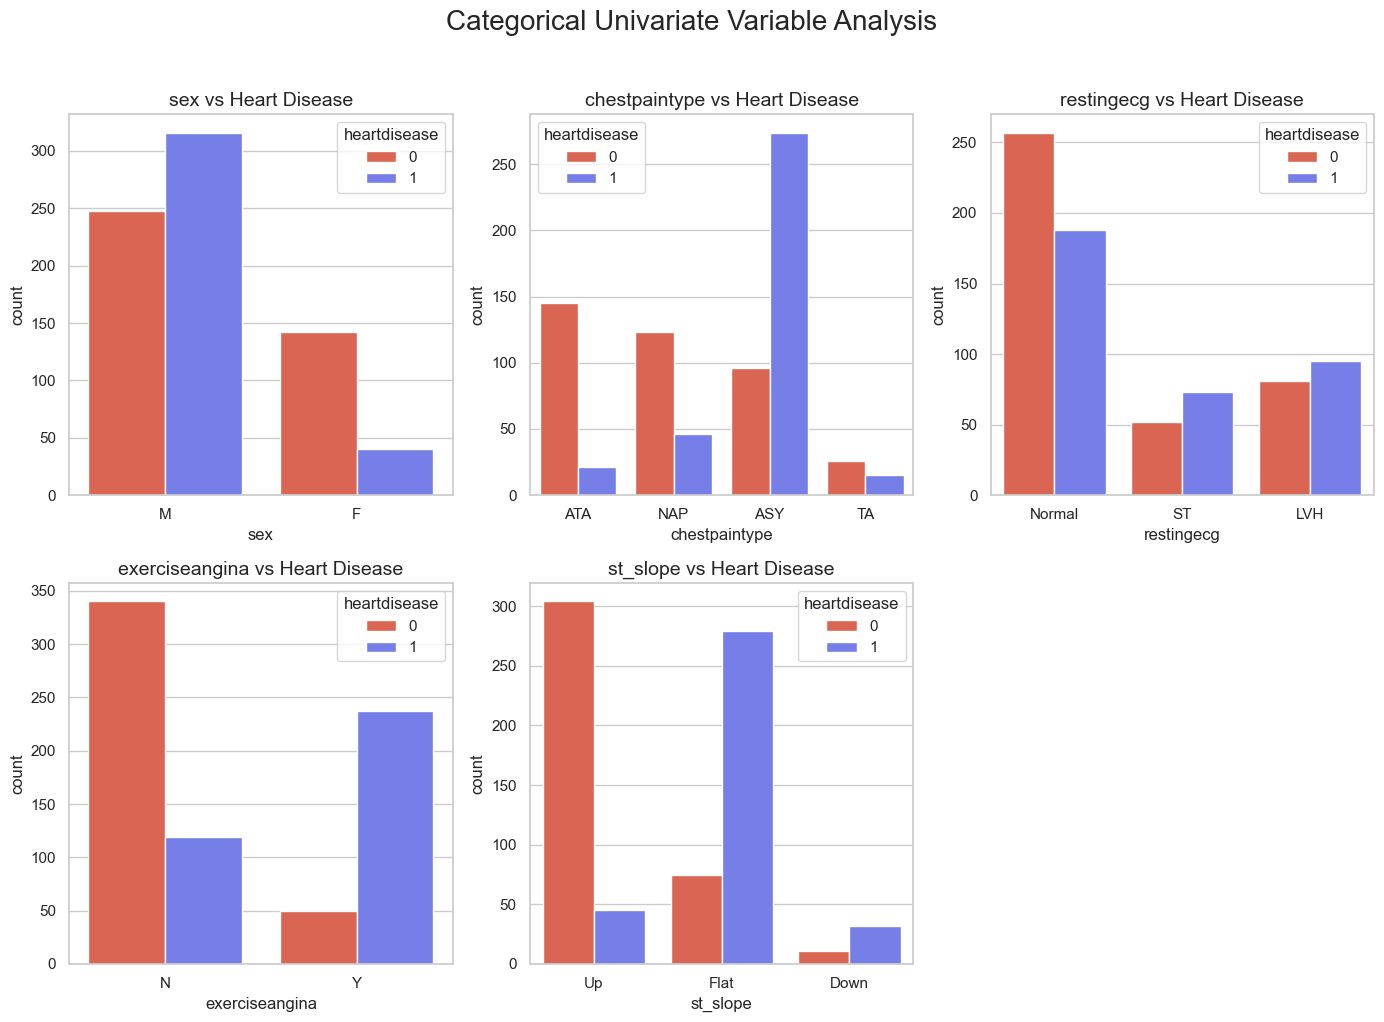

In [90]:
color = ['#EF553B','#636EFA']
sn.set(style="whitegrid")

fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(catg_lst):
    plt.subplot(2,3,i+1)
    sn.countplot(data=heart,x=heart[col],hue='heartdisease',palette=color)
    plt.title(f'{col} vs Heart Disease',fontsize=14)

# removing empty subplots    
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
    
fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)        
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

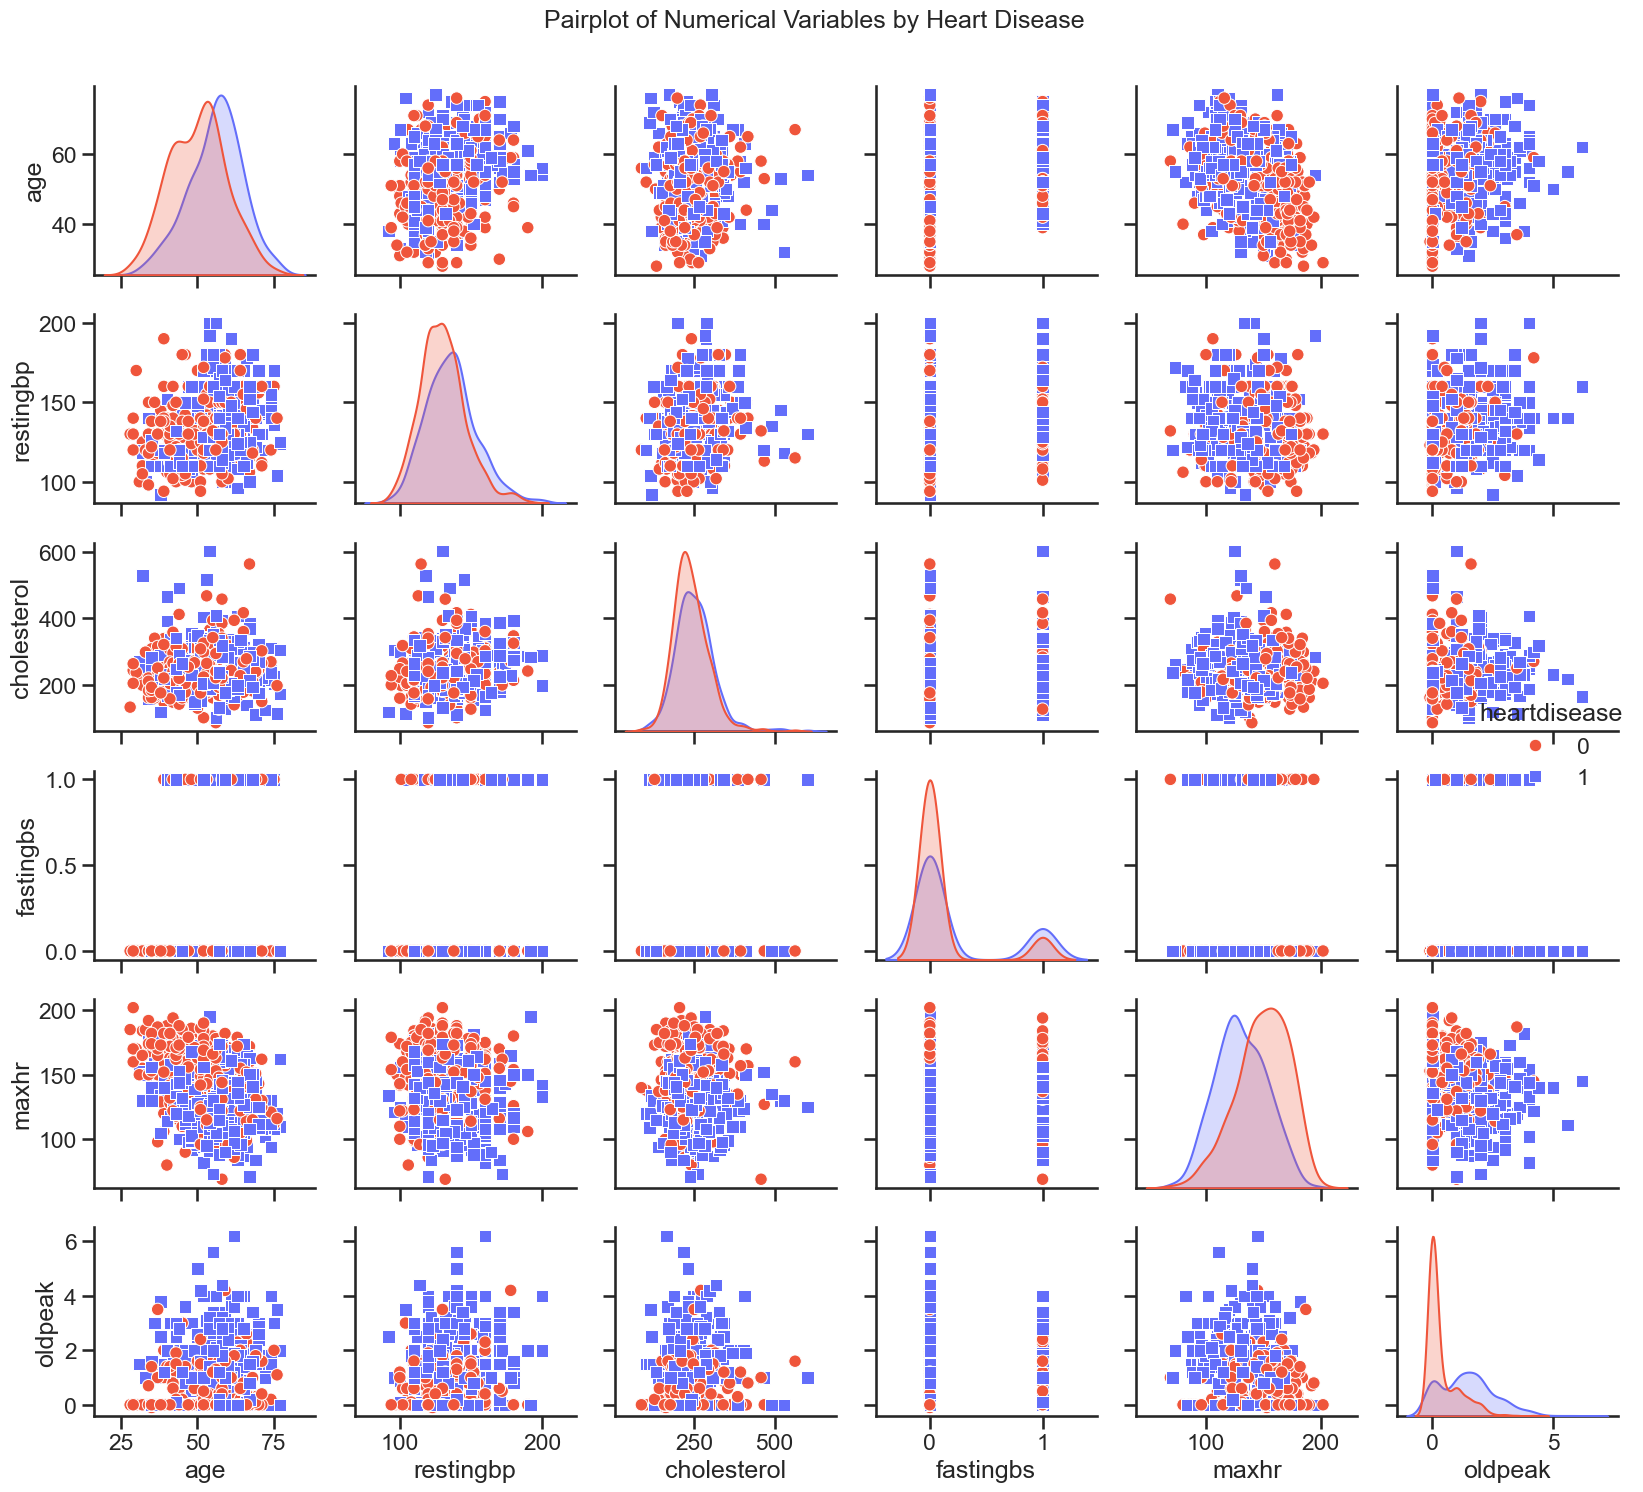

In [91]:

sn.set(style="ticks")
sn.set_context("talk")
pairplot = sn.pairplot(data=heart[num_lst], hue='heartdisease', palette=color,markers=['o','s'])
plt.subplots_adjust(top=1)
pairplot.fig.suptitle("Pairplot of Numerical Variables by Heart Disease", fontsize=18,y=1)
plt.tight_layout()
plt.show()

In [92]:
"""
b2 tien xu ly( data preprocessing)
xu ly cac bien ve dinh danh. thuong phai chuyen sang dinh so.
o day ta thay cac con dau that se duoc kyy hieu la TA,ATA,NAP,ASY
"""
heart.head()


,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [93]:
heart.chestpaintype.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [94]:
ports = pd.get_dummies(heart['chestpaintype'], prefix='chestpaintype', prefix_sep='_')
heart.drop(['chestpaintype'], axis=1,inplace=True)
ports.head()

,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False


In [95]:
# noi cac cot o tren vao bang heart
heart = heart.join(ports)
heart.head()

,age,sex,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA
0,40,M,140,289,0,Normal,172,N,0.0,Up,0,False,True,False,False
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1,False,False,True,False
2,37,M,130,283,0,ST,98,N,0.0,Up,0,False,True,False,False
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1,True,False,False,False
4,54,M,150,195,0,Normal,122,N,0.0,Up,0,False,False,True,False


In [96]:
# chuyen gioi tinh. M: 0, F:1
heart.sex = heart.sex.map({'M':0,'F':1})

In [97]:
heart.head()

,age,sex,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,False,True,False,False
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,False,False,True,False
2,37,0,130,283,0,ST,98,N,0.0,Up,0,False,True,False,False
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,True,False,False,False
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,False,False,True,False


In [98]:
# lam tuong tu voi restingECG
heart.restingecg.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [99]:
port = pd.get_dummies(heart['restingecg'], prefix='restingecg', prefix_sep='_')
heart.drop(['restingecg'], axis=1,inplace=True)
port.head()

,restingecg_LVH,restingecg_Normal,restingecg_ST
0,False,True,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False


In [100]:
# chuyen phan tap the duc . N: 0, Y:1
heart.exerciseangina = heart.exerciseangina.map({'N':0,'Y':1})

In [101]:
heart.st_slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [102]:
convert = pd.get_dummies(heart['st_slope'], prefix='st_slope', prefix_sep='_')
heart.drop(['st_slope'], axis=1,inplace=True)
convert.head()

,st_slope_Down,st_slope_Flat,st_slope_Up
0,False,False,True
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,True


In [103]:
heart = heart.join(port)
heart = heart.join(convert)
heart.head()

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,heartdisease,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
0,40,0,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,1,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,0,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,1,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,0,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


In [106]:
heart.to_csv("heart3.csv",index=False)

In [107]:
# Data Preprocessing
x = heart.drop(['heartdisease'],axis=1) # bien doc lap
y = heart['heartdisease'] # bien phu thuoc

In [108]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                746 non-null    int64  
 1   sex                746 non-null    int64  
 2   restingbp          746 non-null    int64  
 3   cholesterol        746 non-null    int64  
 4   fastingbs          746 non-null    int64  
 5   maxhr              746 non-null    int64  
 6   exerciseangina     746 non-null    int64  
 7   oldpeak            746 non-null    float64
 8   chestpaintype_ASY  746 non-null    bool   
 9   chestpaintype_ATA  746 non-null    bool   
 10  chestpaintype_NAP  746 non-null    bool   
 11  chestpaintype_TA   746 non-null    bool   
 12  restingecg_LVH     746 non-null    bool   
 13  restingecg_Normal  746 non-null    bool   
 14  restingecg_ST      746 non-null    bool   
 15  st_slope_Down      746 non-null    bool   
 16  st_slope_Flat      746 non-null

In [109]:
# kiem tra cac bien missing value
# F: khong co | T: co
x.isnull().values.any()


False

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=21)

In [111]:
# Chuan hoa du lieu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)

x_train = pd.DataFrame(x_train_std, columns=x.columns)
x_test = pd.DataFrame(x_test_std, columns=x.columns)

display(x_train.head())
display(x_test.head())

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
0,-0.513925,1.760370,0.982980,-0.298329,-0.448652,-0.417279,1.264636,0.091771,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
1,0.012418,1.760370,-0.754019,0.496747,-0.448652,-0.417279,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,-0.950295,1.066553
2,-1.566610,-0.568063,-1.333019,-0.924240,-0.448652,0.398792,1.264636,0.091771,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
3,0.749297,-0.568063,0.519780,-0.484411,-0.448652,-1.233351,1.264636,1.490840,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
4,-0.092851,-0.568063,1.561980,-0.822741,-0.448652,1.010845,-0.790742,-0.840942,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,-0.950295,1.066553


,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
0,1.486177,-0.568063,1.561980,0.699745,-0.448652,-1.314958,1.264636,0.558127,1.008076,-0.534983,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,-0.247318,1.052304,-0.937600
1,-0.408656,-0.568063,0.403980,-0.974989,-0.448652,1.296470,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,-0.950295,1.066553
2,1.380909,1.760370,0.751380,0.564413,-0.448652,0.480399,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,1.799621,-1.215897,-0.448652,-0.247318,1.052304,-0.937600
3,1.170372,-0.568063,-0.464519,1.088824,-0.448652,-0.376476,1.264636,0.837941,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
4,0.328223,1.760370,-0.175019,-0.433661,-0.448652,0.970042,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,-1.215897,2.228901,-0.247318,-0.950295,1.066553


In [112]:
# xây dựng hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def z(theta, x):
    return x.T @ theta
def hypothesis(theta, x):
    return sigmoid(z(theta, x))
 

In [113]:
# xây dựng hàm mất mát
def loss(y, y_pred):
    m = len(y)
    return (-1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

In [114]:
def gradient_descent(x, y, y_pred, theta, learning_rate):
    m = len(y)
    gradient = (1/m) * np.dot(x.T, (y_pred - y))
    theta -= learning_rate * gradient

In [115]:
def predict(x, theta):
    z = np.dot(x, theta)
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]

Iteration 0: theta = [ 0.00138821 -0.0014388   0.00083527  0.00036792  0.00081667 -0.00183004
  0.0027417   0.0024753   0.00251511 -0.0020011  -0.00088403 -0.00024189
  0.00035831 -0.00053849  0.00030002  0.00080986  0.00292893 -0.00330948], cost = 0.6931471805599453
Iteration 100: theta = [ 0.08564622 -0.10747122  0.05279441  0.02727806  0.05295496 -0.1113619
  0.18013198  0.16350158  0.16369553 -0.12838048 -0.05807097 -0.01815955
  0.0206309  -0.02865216  0.01418373  0.04758031  0.20167747 -0.22405834], cost = 0.44400766172085904
Iteration 200: theta = [ 0.12095981 -0.17605613  0.07715721  0.04451295  0.07837358 -0.15198333
  0.263673    0.24178772  0.2385292  -0.18543574 -0.08453358 -0.02959897
  0.02753494 -0.03518098  0.0149113   0.06331324  0.30501622 -0.33482599], cost = 0.38672556224754334
Iteration 300: theta = [ 0.14035432 -0.22951825  0.0928064   0.05777276  0.09473242 -0.16853256
  0.31212819  0.28960847  0.28201286 -0.21788724 -0.0994269  -0.03841438
  0.03051007 -0.035721

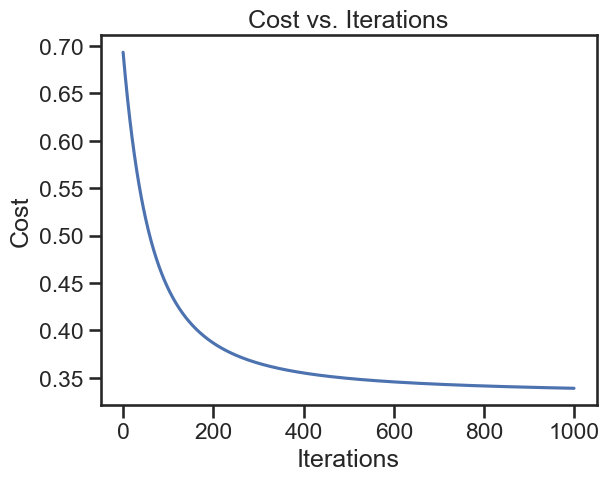

In [116]:
# huấn luyện mô hình
theta = np.zeros(x_train.shape[1])
learning_rate = 0.01
num_iterations = 1000
costs = []

for i in range(num_iterations):
    y_pred_train = sigmoid(np.dot(x_train, theta))
    gradient_descent(x_train, y_train, y_pred_train, theta, learning_rate)
    
    # Tính giá trị hàm mất mát và lưu vào danh sách 'costs'
    cost = loss(y_train, y_pred_train)
    costs.append(cost)
    
    if i % 100 == 0:
        print(f'Iteration {i}: theta = {theta}, cost = {cost}')

# In giá trị theta sau 1000 vòng lặp
print(f'Final theta: {theta}')
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [117]:

y_pred_test = predict(x_test, theta)
# Initialize an empty dictionary to store the data
data = {}

# Iterate over the columns in x_test and add them to the data dictionary
for col in x_test.columns:
    data[col] = x_test[col].tolist()

# Add y_test and y_pred_test to the data dictionary
data['y_test'] = y_test.tolist()
data['y_pred_test'] = y_pred_test

# Create a DataFrame from the data
test_results = pd.DataFrame(data)

# Print a sample of the DataFrame
print(test_results.sample(10))




          age       sex  restingbp  cholesterol  fastingbs     maxhr  \
61  -1.671879 -0.568063  -0.175019     0.090750  -0.448652  1.908524   
141 -1.671879 -0.568063  -0.754019    -0.365995  -0.448652  1.133256   
69  -1.566610 -0.568063  -1.333019     0.750494  -0.448652 -1.437368   
85  -1.356073 -0.568063  -0.754019     3.744716   2.228901  0.480399   
119 -0.724462 -0.568063   0.403980     0.513663  -0.448652  1.010845   
10   0.328223 -0.568063  -0.754019    -0.078415  -0.448652  1.174060   
101  0.117686  1.760370  -0.175019     0.141500  -0.448652  0.602810   
35   0.117686  1.760370   1.561980    -0.738158  -0.448652  0.929238   
18  -2.092953 -0.568063  -0.754019     0.902743  -0.448652  1.826917   
42   1.170372 -0.568063   0.461880    -0.010749   2.228901 -0.988529   

     exerciseangina   oldpeak  chestpaintype_ASY  chestpaintype_ATA  \
61        -0.790742  2.423552          -0.991989          -0.534983   
141       -0.790742 -0.840942           1.008076          -0.5349

In [118]:
# đánh giá mô hình
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
accuracy = np.mean(y_test == y_pred_test)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        79
           1       0.83      0.90      0.86        71

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

